# Name    :  K.Rishitha
# Project : Detecting fake news

# About the dataset
It has the following attributes:

1.  unnamed:0 : unique id for a news article
2.  title: the title of a news article
3.  text: the text of the article; could be incomplete
4. label: a label that marks the article as potentially unreliable

The size of the dataset is 6335 x 4, which means it has 6335 rows and 4 columns.
We have 80% of data as training data and 20% data as testing data.

# The steps involved in the workflow of our project are:

1. First, we import the necessary libraries required for our project.
2. Read and explore the dataset
3. Now, we split our dataset into training and testing sets. The training set would contain the data which will be fed into the model. The testing set will contain the data on which we test the trained and validated model.
4. Now, we initialize a TfidfVectorizer with stop words from the English language
5. Next, we’ll initialize a PassiveAggressiveClassifier and try to calculate the accuracy.
6. Finally, we print out a confusion matrix to gain insight into the number of false and true negatives and positives.


# Architecture
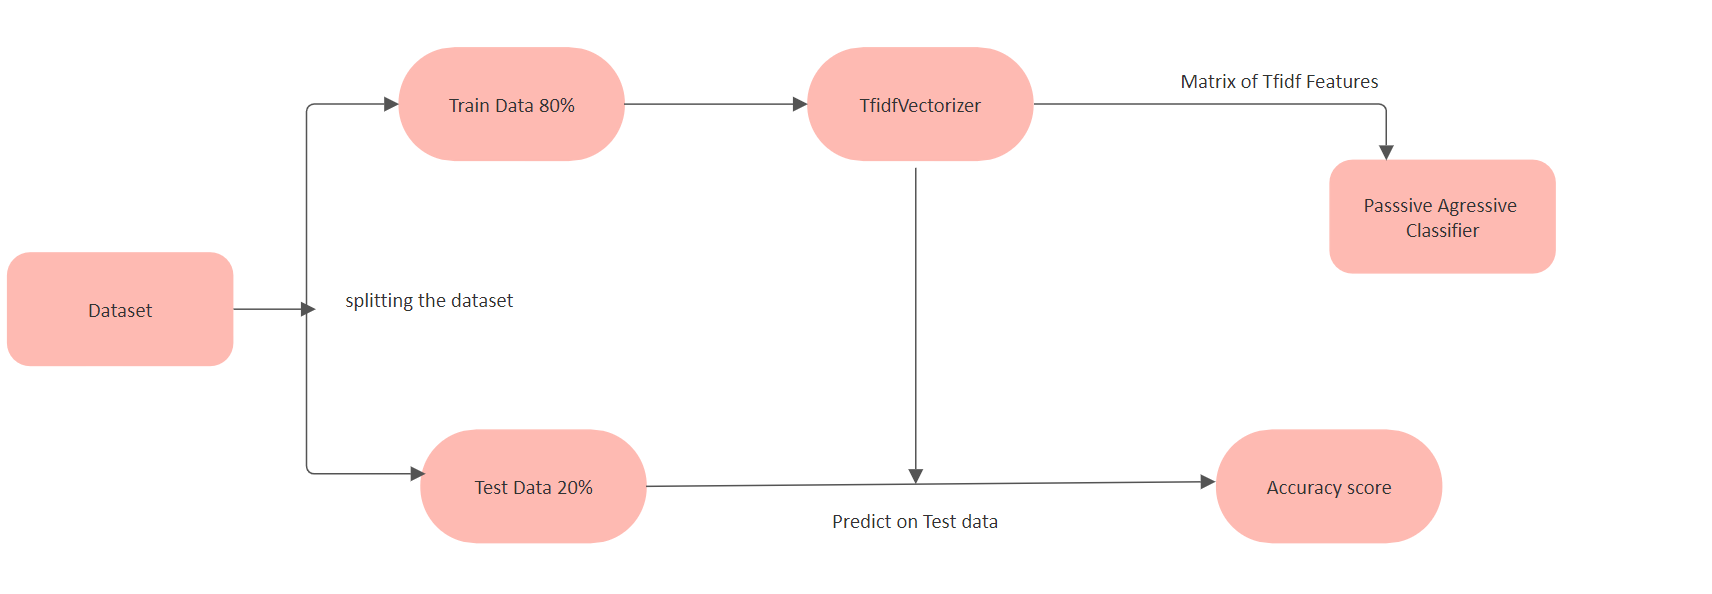

In [ ]:
pip install numpy pandas sklearn


#  1. Import necessary libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import itertools
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Read and explore the dataset

In [ ]:
news_data= pd.read_csv("news.csv")
news_data.head(10)

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
5,6903,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",FAKE
6,7341,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE
7,95,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,REAL
8,4869,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,REAL
9,2909,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,REAL


# **Data Handling**

In [ ]:
news_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [ ]:
news_data.shape

(6335, 4)

In [ ]:
news_data.describe()

,Unnamed: 0
count,6335.000000
mean,5280.415627
std,3038.503953
min,2.000000
25%,2674.500000
50%,5271.000000
75%,7901.000000
max,10557.000000


In [ ]:
news_data["label"].value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

In [ ]:
labels= news_data.label
labels.head(10)

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
5    FAKE
6    FAKE
7    REAL
8    REAL
9    REAL
Name: label, dtype: object

In [ ]:
news_data.isnull().any()

Unnamed: 0    False
title         False
text          False
label         False
dtype: bool

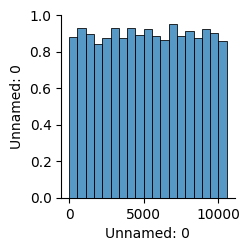

In [ ]:
sns.pairplot(data=news_data,dropna=True)

# 3. Build the model with test size=0.4

In [ ]:
#First, we split the dataset into train & test samples:
x_train, x_test, y_train, y_test= train_test_split(news_data["text"], labels, test_size= 0.4, random_state= 7)

In [ ]:

#Then we’ll initialize TfidfVectorizer with English stop words
vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train=vectorizer.fit_transform(x_train)
tfidf_test=vectorizer.transform(x_test)

In [ ]:
#Create a PassiveAggressiveClassifier
passive=PassiveAggressiveClassifier(max_iter=50)
passive.fit(tfidf_train,y_train)

y_pred=passive.predict(tfidf_test)

#4. Evaluate the model's accuracy

In [ ]:
#Create a confusion matrix
matrix= confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])
matrix

array([[1188,   82],
       [  91, 1173]])

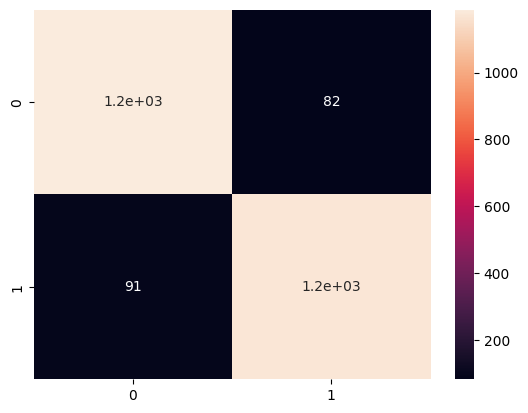

In [ ]:
#Visualize the confusion matrix
sns.heatmap(matrix, annot=True)
plt.show()

In [ ]:
#Calculate the model's accuracy
Accuracy=accuracy_score(y_test,y_pred)
Accuracy*100

93.17284925019732

#### The model's accuracy is 93%

In [ ]:
Report= classification_report(y_test, y_pred)
print(Report)

              precision    recall  f1-score   support

        FAKE       0.93      0.94      0.93      1270
        REAL       0.93      0.93      0.93      1264

    accuracy                           0.93      2534
   macro avg       0.93      0.93      0.93      2534
weighted avg       0.93      0.93      0.93      2534



After implemented a TfidfVectorizer, initialized a PassiveAggressiveClassifier, and fit our model. We ended up obtaining an accuracy of 93.17% . Also, with this model, we ended up getting 1188 true positives, 1173 true negatives, 82 false positives and 91 false negatives.

# Building model with test data size as 0.2

In [ ]:
# Splitting the dataset into training and testing sets

x_train, x_test, y_train, y_test = train_test_split(news_data['text'], labels, test_size = 0.2, random_state = 7)


In [ ]:
# Now, we fit and transform the vectorizer on the train set, and transform the vectorizer on the test set

# Initialize a TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words = 'english', max_df = 0.7)

# Fit and tranform train set, transform test set
tfidf_train = tfidf_vectorizer.fit_transform(x_train)
tfidf_test = tfidf_vectorizer.transform(x_test)


In [ ]:

# Initialize a PassiveAggressiveClassifier
pac = PassiveAggressiveClassifier(max_iter = 50)
pac.fit(tfidf_train, y_train)

PassiveAggressiveClassifier(max_iter=50)

## Evaluate the model's accuracy

In [ ]:
# Predict on the test set and calculate accuracy
y_pred2 = pac.predict(tfidf_test)
score = accuracy_score(y_test, y_pred2)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 92.58%


In [ ]:
# Building confusion matrix
matrix2=confusion_matrix(y_test, y_pred2, labels = ['FAKE','REAL'])

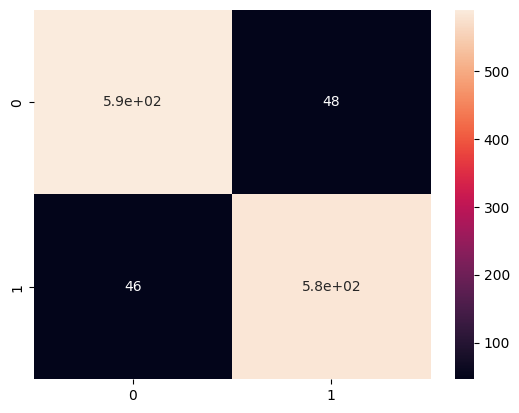

In [ ]:
#Visualize the confusion matrix
sns.heatmap(matrix2, annot=True)
plt.show()

In [ ]:
matrxi2=confusion_matrix(y_test, y_pred2, labels = ['FAKE','REAL'])
matrxi2

array([[590,  48],
       [ 46, 583]])

In [ ]:
Report= classification_report(y_test, y_pred2)
print(Report)

              precision    recall  f1-score   support

        FAKE       0.93      0.92      0.93       638
        REAL       0.92      0.93      0.93       629

    accuracy                           0.93      1267
   macro avg       0.93      0.93      0.93      1267
weighted avg       0.93      0.93      0.93      1267



After implemented a TfidfVectorizer, initialized a PassiveAggressiveClassifier, and fit our model with test data size of 0.2. We ended up obtaining an accuracy of 92.58% . Also, with this model, we ended up getting 590 true positives, 583 true negatives, 48 false positives and 46 false negatives.

# Model Accuracy

As we are getting almost equal accuracy with test size=0.2 and test size=0.4 but 0.2 test size has less fp,fn having less fp,fn with good accuracy is the best model

In [ ]:
#final confusion matrix with accuracy is with test size=0.2
y_pred2 = pac.predict(tfidf_test)
score = accuracy_score(y_test, y_pred2)
print(f'Accuracy: {round(score*100,2)}%')


Accuracy: 92.58%


In [ ]:
matrxi2=confusion_matrix(y_test, y_pred2, labels = ['FAKE','REAL'])
matrxi2

array([[590,  48],
       [ 46, 583]])

In [ ]:

Report= classification_report(y_test, y_pred2)
print(Report)

              precision    recall  f1-score   support

        FAKE       0.93      0.92      0.93       638
        REAL       0.92      0.93      0.93       629

    accuracy                           0.93      1267
   macro avg       0.93      0.93      0.93      1267
weighted avg       0.93      0.93      0.93      1267

